1. Prerequisites:

IAM Roles: Ensure appropriate permissions are set up for all services:
    Amazon S3 Full Access for storage.
    Amazon Transcribe Full Access for transcription tasks.
    Amazon SageMaker Full Access for handling ML model tasks, orchestrating workflows, and formatting emails.
    Amazon Bedrock Full Access for processing transcribed texts.
   
Amazon Services: Set up the following services:
    Amazon Transcribe for converting speech to text.
    Amazon Bedrock for processing text (such as Claude 3 Sonnet model).
    Amazon SageMaker for orchestrating workflows and managing email formatting.
    Amazon S3 for storing files (audio, transcriptions, email records).
    API Gateway to route client requests.

2. Permissions:

    Amazon S3: Full access to store audio files, transcripts, and email content.
    Amazon Transcribe: Permissions to create transcription jobs and access results.
    Amazon Bedrock: Access to Bedrock services, particularly for Claude 3 Sonnet.
    Amazon SageMaker: Permissions for orchestrating the entire flow (audio upload, invoking Transcribe and Bedrock, and managing formatted email content).

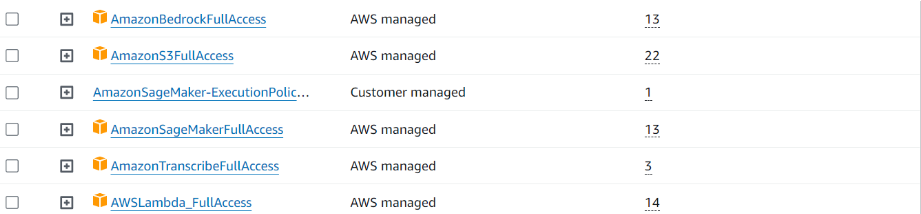

3. Steps to Get Started:

Set Up IAM Roles:
    Configure IAM roles with the required policies for each AWS service (S3, Transcribe, Bedrock, SageMaker).

Service Setup:
    Create an S3 bucket for storing audio and email content.
    Set up Amazon Transcribe to handle speech-to-text tasks.
    Prepare Amazon Bedrock for text processing (Claude 3 Sonnet).
    Deploy an Amazon SageMaker notebook for managing the orchestration of processes.
    Configure API Gateway for accepting requests and passing them to SageMaker.

Client Integration:
    Ensure the client application can record audio and send it via API Gateway.
    Capture necessary metadata to facilitate transcription and processing.

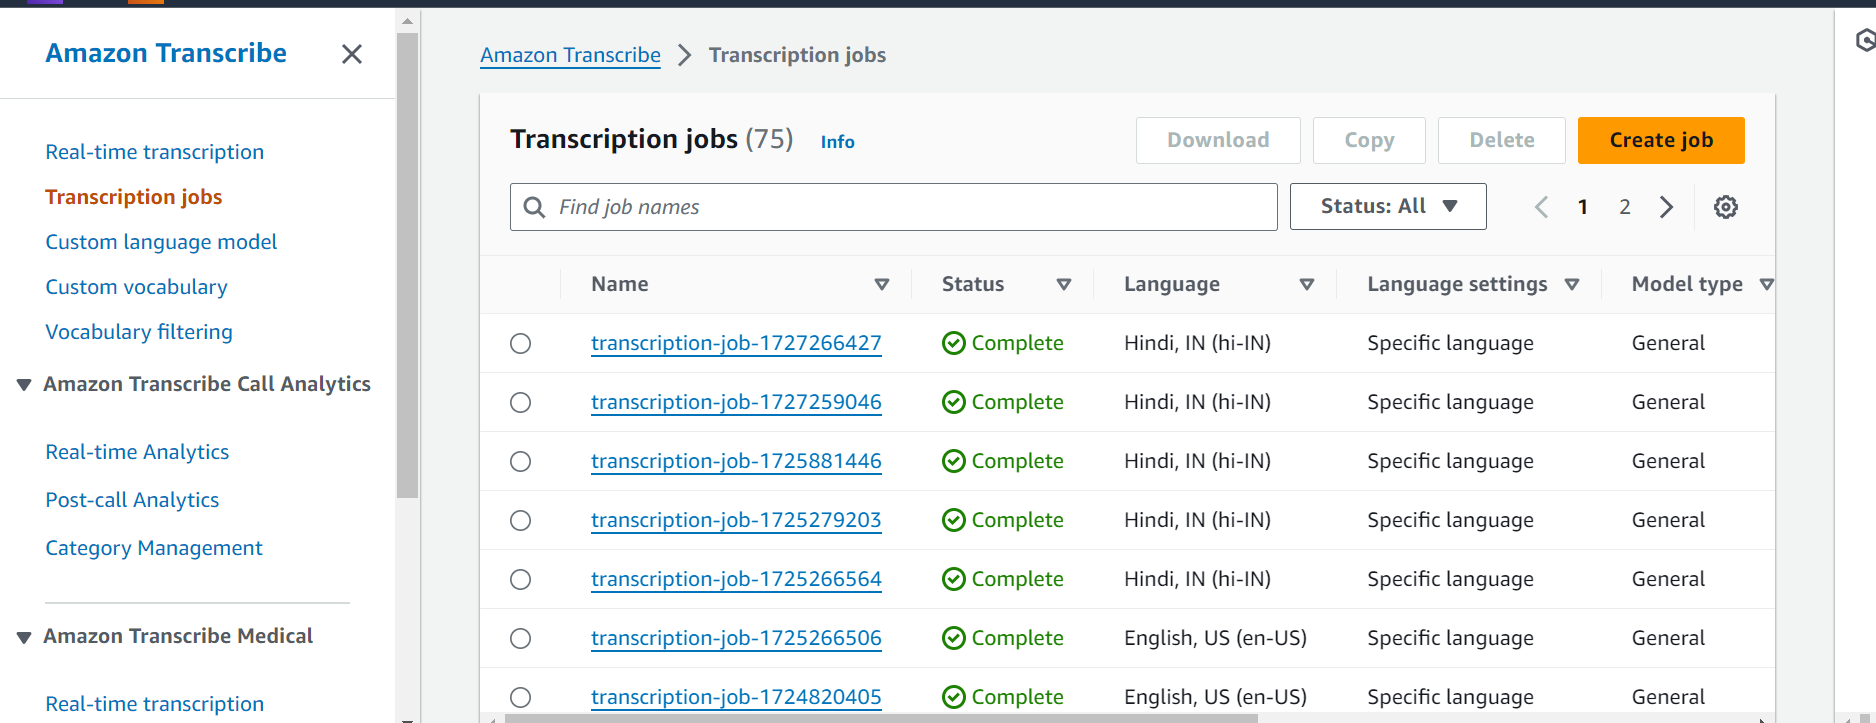

In [ ]:
#llm call to model
def translate_text(text):
    tokens = min(len(text.split(" ")) * 1.5, 1000)
    body = json.dumps({
        "max_tokens": int(tokens),
        "temperature": 0,
        "system": "You are a good language translator. Translate the content into English.",
        "messages": [
            {
                "role": "user",
                "content": [{"type": "text", "text": text}]
            }
        ]
    })

Buckets

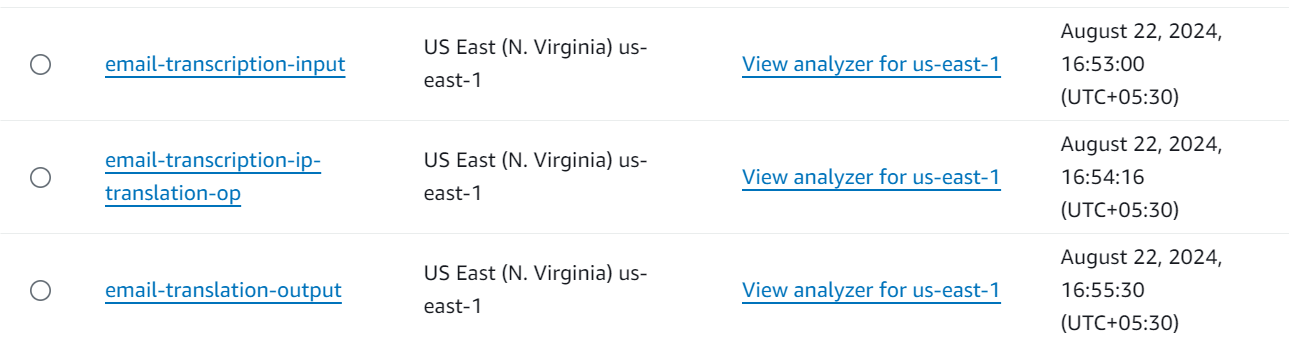

4. Tasks in the Right Order (Task List):

User Records Audio:
    Record audio in native language via client application.

User Sends Request via API Gateway:
    Audio is sent along with metadata to API Gateway.

API Gateway Triggers SageMaker Endpoint:
    SageMaker endpoint receives the request via API Gateway and initiates the processing flow.

SageMaker Uploads Audio to S3:
    SageMaker uploads the audio file to an S3 bucket for storage and further processing.

SageMaker Invokes Amazon Transcribe:
    SageMaker initiates the transcription process using Amazon Transcribe to convert the audio into text.

Transcribe Returns Transcript to SageMaker:
    The transcribed text is returned to the SageMaker notebook for further steps. The transcription is also stored in a specific bucket.

SageMaker Sends Transcript to Amazon Bedrock:
    The transcript is forwarded to Amazon Bedrock for processing (translation, language refinement, etc.).

Bedrock Processes Text:
    Bedrock processes the text, refining it and generating a professional email based on the provided prompts.

Bedrock Returns Processed Text to SageMaker:
    Processed text is returned to SageMaker for final formatting.

SageMaker Formats Email:
    SageMaker finalizes the email formatting, ensuring it's professional and grammatically correct.

SageMaker Stores Result in S3:
    The formatted email is stored in S3 for record-keeping or future reference.

SageMaker Returns Response via API Gateway:
    SageMaker sends the response back through API Gateway.

Processed Email Sent to User:
    The client application receives the final, professionally formatted email content.